# EXAMPLE 3.6 (page 96 )

For the two-bar truss shown in Figure 3–14, determine the displacement in the y direction
of node 1 and the axial force in each element. A force of P 5 1000 kN is applied at node 1
in the positive y direction while node 1 settles an amount d 5 50 mm in the negative x
direction. Let E 5 210 GPa and A 5 3 6.00 10 m 24 2 for each element. The lengths of the
elements are shown in the figure.

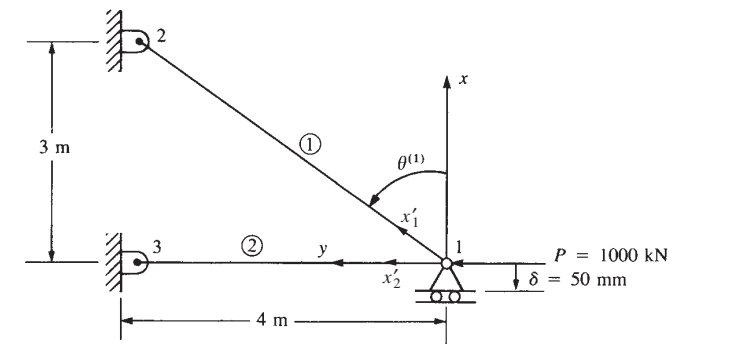

In [1]:
from IPython.display import Image
Image("C:/Users/49171/Desktop/VW/Example_image.png")

# SOLUTION:


In [2]:
import numpy as np
import copy
import math
import matplotlib.pyplot as plt

In [3]:
E = 210000000 #200*10**9 # (N/m^2)
A = 6/10000 # 0.005 # (m^2)

In [4]:
x = 3
y = 4
d = (x**2 + y**2)**0.5
dgree = np.arccos(x/d)
dgree*180/math.pi
print(dgree*180/math.pi)


53.13010235415598


# Element A (from node 1 to 2 )

In [5]:
theta = 53.130  #rad

#convert rad to degree
theta=theta*math.pi/180


# 1 rad * (Pi/180) =dgree


L = 5 #meter

# Top left quarter
e11 = math.cos(theta)**2
e12 = math.cos(theta)*math.sin(theta)
e21 = math.cos(theta)*math.sin(theta)
e22 = math.sin(theta)**2
    
k11_12 = (E*A/L)*np.array([[e11, e12],[e21, e22]])
    
# Top right quarter
e11 = -math.cos(theta)**2
e12 = -math.cos(theta)*math.sin(theta)
e21 = -math.cos(theta)*math.sin(theta)
e22 = -math.sin(theta)**2

k12_12 = (E*A/L)*np.array([[e11, e12],[e21, e22]])

    
# Bottem Left quarter
e11 = -math.cos(theta)**2
e12 = -math.cos(theta)*math.sin(theta)
e21 = -math.cos(theta)*math.sin(theta)
e22 = -math.sin(theta)**2

k21_12 = (E*A/L)*np.array([[e11, e12],[e21, e22]])
    
# Bottem Right quarter 
e11 = math.cos(theta)**2
e12 = math.cos(theta)*math.sin(theta)
e21 = math.cos(theta)*math.sin(theta)
e22 = math.sin(theta)**2

k22_12 = (E*A/L)*np.array([[e11, e12],[e21, e22]])

# Concatenate k11 and k12
top = np.concatenate((k11_12,k12_12), axis =1)

# Concatenate k21 and k22
btm = np.concatenate((k21_12,k22_12), axis =1)

# Concatenate Top and bmt

k1 = np.concatenate((top,btm), axis =0)
k1_s= k1/25200
print("Global stiffness Matrix for element one : ")
print(np.round(k1_s, 3))



Global stiffness Matrix for element one : 
[[ 0.36  0.48 -0.36 -0.48]
 [ 0.48  0.64 -0.48 -0.64]
 [-0.36 -0.48  0.36  0.48]
 [-0.48 -0.64  0.48  0.64]]


# Element B (from node 2 to node 3)

In [6]:
theta = 270 #rad

#convert rad to degree
theta=theta*math.pi/180

L = 4

# Top left quarter
e11 = math.cos(theta)**2
e12 = math.cos(theta)*math.sin(theta)
e21 = math.cos(theta)*math.sin(theta)
e22 = math.sin(theta)**2
    
k11_23 = (E*A/L)*np.array([[e11, e12],[e21, e22]])
    
# Top right quarter
e11 = -math.cos(theta)**2
e12 = -math.cos(theta)*math.sin(theta)
e21 = -math.cos(theta)*math.sin(theta)
e22 = -math.sin(theta)**2

k12_23 = (E*A/L)*np.array([[e11, e12],[e21, e22]])

    
# Bottem Left quarter
e11 = -math.cos(theta)**2
e12 = -math.cos(theta)*math.sin(theta)
e21 = -math.cos(theta)*math.sin(theta)
e22 = -math.sin(theta)**2

k21_23 = (E*A/L)*np.array([[e11, e12],[e21, e22]])
    
# Bottem Right quarter 
e11 = math.cos(theta)**2
e12 = math.cos(theta)*math.sin(theta)
e21 = math.cos(theta)*math.sin(theta)
e22 = math.sin(theta)**2

k22_23 = (E*A/L)*np.array([[e11, e12],[e21, e22]])

# Concatenate k11 and k12
top = np.concatenate((k11_23,k12_23), axis =1)

# Concatenate k21 and k22
btm = np.concatenate((k21_23,k22_23), axis=1)

# Concatenate Top and bmt

k2 = np.concatenate((top,btm), axis =0)
k2_s = k2/25200
print("Global stiffness Matrix for element two : ")

print(np.round(k2_s, 2))
#k11_23/25200
#print(np.round(k11_23/25200,3))

Global stiffness Matrix for element two : 
[[ 0.    0.   -0.   -0.  ]
 [ 0.    1.25 -0.   -1.25]
 [-0.   -0.    0.    0.  ]
 [-0.   -1.25  0.    1.25]]


In [7]:

#M = np.zeros((6,6))
#M1 = np.matrix([[1,2,3,4],[5,6,7,8],[9,10,11,12],[13, 14, 15,16]])
#M2 = np.matrix([[1,2,3,4],[5,6,7,8],[9,10,11,12],[13, 14, 15,16]])
#M3 = np.matrix([[1,2],[3,4]])
#M4 = np.matrix([[1,2],[3,4]])
#M[:4,:4] += M1
#M[2:6, 2:6] += M2
#M[2:4, 2:4] += M3
#M[3:5, 3:5] += M4

#M



K_total = np.zeros((6,6))


K_total[:2,:2] += (k11_12 + k11_23)
K_total[0:2,2:4] += k12_12
K_total[0:2,4:6] += k12_23

K_total[2:4,0:2] += k21_12
K_total[2:4,2:4] += k22_12


K_total[4:6,0:2] += k12_23

K_total[4:6,4:6] += k22_23
K_total = K_total/25200
print(np.round(K_total, 2))


[[ 0.36  0.48 -0.36 -0.48 -0.   -0.  ]
 [ 0.48  1.89 -0.48 -0.64 -0.   -1.25]
 [-0.36 -0.48  0.36  0.48  0.    0.  ]
 [-0.48 -0.64  0.48  0.64  0.    0.  ]
 [-0.   -0.    0.    0.    0.    0.  ]
 [-0.   -1.25  0.    0.    0.    1.25]]


In [8]:
u1 = -50/1000
#v1 = need to caluclaue 
u2 = 0
v2 = 0
u3 = 0
v3 = 0


In [9]:
#25200(0.48*u1 + 1.89v1) = p =f1y = 1000

In [10]:
p = f1y = 1000 #N
d = u1= -0.05 #mm

In [11]:
v1 = ((1000/25200) + 0.48*(0.05))/1.89
print(np.round(v1,4))

0.0337


In [12]:
ke= (25200*(np.array([[1, -1], [-1, 1]])))
ke

array([[ 25200, -25200],
       [-25200,  25200]])

In [13]:
de = np.array([[0.6, 0.8, 0 , 0], [0, 0, 0.6, 0.8]])
de

array([[0.6, 0.8, 0. , 0. ],
       [0. , 0. , 0.6, 0.8]])

In [14]:
oe = np.array([[-0.05],[0.0337], [0], [0]])
oe

array([[-0.05  ],
       [ 0.0337],
       [ 0.    ],
       [ 0.    ]])

# Element 1


In [15]:
fx1_2 =  ke.dot(de.dot(oe))
fx1_2

array([[-76.608],
       [ 76.608]])

# Element 2


In [16]:
oee = np.array([[-0.05],[0.0337], [0], [0]] )
oee

array([[-0.05  ],
       [ 0.0337],
       [ 0.    ],
       [ 0.    ]])

In [17]:
dee = np.array([[0, 1, 0 , 0], [0, 0, 0, 1]])
dee

array([[0, 1, 0, 0],
       [0, 0, 0, 1]])

In [18]:
kee = (31500*(np.array([[1, -1], [-1, 1]])))
kee

array([[ 31500, -31500],
       [-31500,  31500]])

In [19]:
fx1_3 =  kee.dot(dee.dot(oee))
fx1_3

array([[ 1061.55],
       [-1061.55]])